In [ ]:
import pandas as pd

# Load the CSV file
data = pd.read_csv('/content/Project1data.csv')

# Display the first few rows of the dataset and its general information
data_info = data.info()
data_head = data.head()
data_info, data_head


In [2]:
# Convert date columns to datetime format
data['datead6'] = pd.to_datetime(data['datead6'], errors='coerce')
data['datelp6'] = pd.to_datetime(data['datelp6'], errors='coerce')

# Remove unnecessary columns with mostly null data
data_cleaned = data.drop(columns=['Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19'])

# Check conversion and column removal
data_cleaned_info = data_cleaned.info()
data_cleaned_head = data_cleaned.head()

data_cleaned_info, data_cleaned_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101533 entries, 0 to 101532
Data columns (total 17 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   targdol   101532 non-null  float64       
 1   datead6   101532 non-null  datetime64[ns]
 2   datelp6   101532 non-null  datetime64[ns]
 3   lpuryear  100804 non-null  float64       
 4   slstyr    101532 non-null  float64       
 5   slslyr    101532 non-null  float64       
 6   sls2ago   101532 non-null  float64       
 7   sls3ago   101532 non-null  float64       
 8   slshist   101532 non-null  float64       
 9   ordtyr    101532 non-null  float64       
 10  ordlyr    101532 non-null  float64       
 11  ord2ago   101532 non-null  float64       
 12  ord3ago   101532 non-null  float64       
 13  ordhist   101532 non-null  float64       
 14  falord    101532 non-null  float64       
 15  sprord    101532 non-null  float64       
 16  train     101532 non-null  float64    

(None,
    targdol    datead6    datelp6  lpuryear  slstyr  slslyr  sls2ago  sls3ago  \
 0      0.0 1980-01-01 1980-01-01       NaN     0.0     0.0      0.0      0.0   
 1      0.0 1980-01-01 1980-01-01       NaN     0.0     0.0      0.0      0.0   
 2      0.0 1980-01-01 1980-01-01       NaN     0.0     0.0      0.0      0.0   
 3      0.0 1980-01-01 1980-01-01       NaN     0.0     0.0      0.0      0.0   
 4      0.0 1980-01-01 1980-01-01       NaN     0.0     0.0      0.0      0.0   
 
    slshist  ordtyr  ordlyr  ord2ago  ord3ago  ordhist  falord  sprord  train  
 0      0.0     0.0     0.0      0.0      0.0      0.0     0.0     0.0    0.0  
 1      0.0     0.0     0.0      0.0      0.0      0.0     0.0     0.0    1.0  
 2      0.0     0.0     0.0      0.0      0.0      0.0     0.0     0.0    0.0  
 3      0.0     0.0     0.0      0.0      0.0      0.0     0.0     0.0    0.0  
 4      0.0     0.0     0.0      0.0      0.0      0.0     0.0     0.0    0.0  )

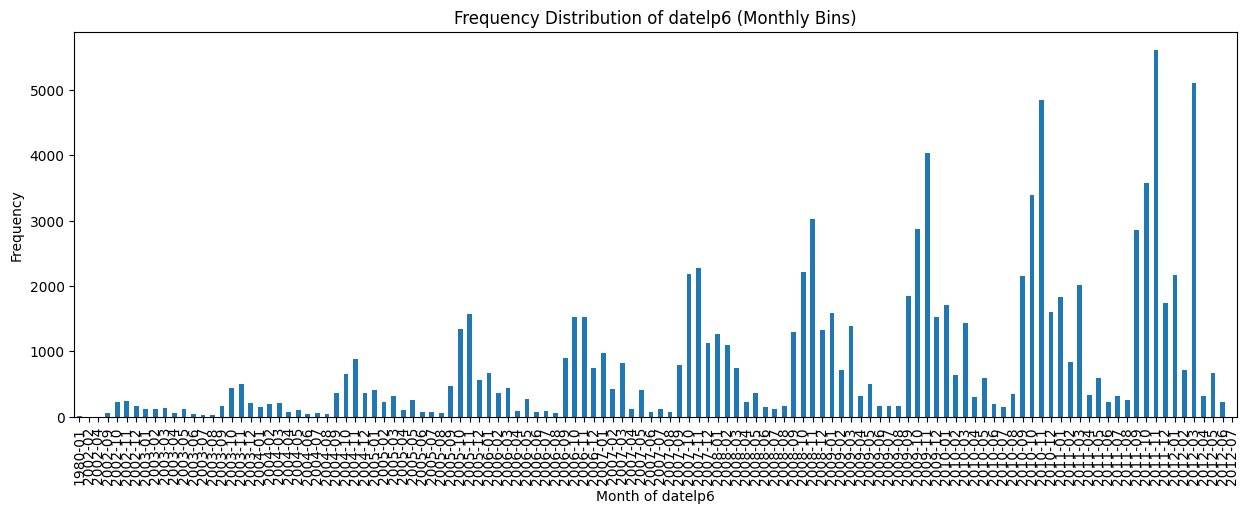

datelp6
1980-01     18
2002-02      1
2002-04      1
2002-09     59
2002-10    227
Freq: M, Name: count, dtype: int64

In [3]:
import matplotlib.pyplot as plt

# Filter the data to include only rows where 'targdol' is not null
datelp6_with_targdol = data_cleaned[data_cleaned['targdol'].notnull()]['datelp6']

# Generate a frequency distribution of 'datelp6'
datelp6_frequency = datelp6_with_targdol.dt.to_period("M").value_counts().sort_index()

# Plot the frequency distribution as a histogram
plt.figure(figsize=(15, 5))
datelp6_frequency.plot(kind='bar')
plt.title('Frequency Distribution of datelp6 (Monthly Bins)')
plt.xlabel('Month of datelp6')
plt.ylabel('Frequency')
plt.show()

# Return the first few entries of the frequency distribution to inspect the binned values
datelp6_frequency.head()


In [4]:
# Identify the most frequent dates in 'datelp6' to inspect binning pattern
datelp6_top_dates = datelp6_with_targdol.dt.to_period("M").value_counts().nlargest(10)
datelp6_top_dates


datelp6
2011-11    5607
2012-03    5105
2010-11    4850
2009-11    4032
2011-10    3582
2010-10    3385
2008-11    3022
2009-10    2875
2011-09    2856
2007-11    2279
Freq: M, Name: count, dtype: int64

In [5]:
# Calculate discrepancy between 'falord' + 'sprord' and 'ordhist'
data_cleaned['ord_discrepancy'] = (data_cleaned['falord'] + data_cleaned['sprord']) != data_cleaned['ordhist']

# Determine the percentage of the dataset where the discrepancy exists
discrepancy_percentage = data_cleaned['ord_discrepancy'].mean() * 100

# Count the number of discrepancies
discrepancy_count = data_cleaned['ord_discrepancy'].sum()

discrepancy_percentage, discrepancy_count


(8.66023854313376, 8793)

In [6]:
# Extract the year from 'datelp6' and create a new column for comparison
data_cleaned['datelp6_year'] = data_cleaned['datelp6'].dt.year

# Find rows where 'lpuryear' does not match the year extracted from 'datelp6'
data_cleaned['lpuryear_discrepancy'] = data_cleaned['lpuryear'] != data_cleaned['datelp6_year']

# Determine the percentage of the dataset where the 'lpuryear' discrepancy exists
lpuryear_discrepancy_percentage = data_cleaned['lpuryear_discrepancy'].mean() * 100

# Count the number of 'lpuryear' discrepancies
lpuryear_discrepancy_count = data_cleaned['lpuryear_discrepancy'].sum()

lpuryear_discrepancy_percentage, lpuryear_discrepancy_count


(100.0, 101533)

In [8]:
from datetime import datetime

# Define today's date for recency calculation (using the latest date in the dataset as a reference)
current_date = data_cleaned['datelp6'].max()

# Feature 1: Days since last purchase (Recency)
data_cleaned['days_since_last_purchase'] = (current_date - data_cleaned['datelp6']).dt.days

# Feature 2: Days since customer was added to file
data_cleaned['days_since_added_to_file'] = (current_date - data_cleaned['datead6']).dt.days

# Feature 3: Discrepancy flags
# Already created: 'ord_discrepancy' and 'lpuryear_discrepancy'

# Feature 4: Customer Lifetime Value (historical)
data_cleaned['customer_lifetime_value'] = data_cleaned[['slstyr', 'slslyr', 'sls2ago', 'sls3ago']].sum(axis=1)

# Feature 5: Purchase Frequency
# Assuming 'lpuryear' is the year of the first purchase
first_purchase_year = data_cleaned['lpuryear'].min()
data_cleaned['purchase_frequency'] = (data_cleaned['lpuryear'] - first_purchase_year) / data_cleaned['ordhist']

# Replace infinite values resulting from division by zero in 'purchase_frequency' with NaN
data_cleaned['purchase_frequency'].replace([float('inf'), -float('inf')], np.nan, inplace=True)

# Feature 6: RFM Features - we already have 'days_since_last_purchase' as Recency
# Frequency can be approximated by the 'ordhist' variable for simplicity
# Monetary value is similar to 'customer_lifetime_value'

# Feature 7: Ratio Features - Order to Sales History Ratio
data_cleaned['ord_to_slshist_ratio'] = data_cleaned['ordhist'] / data_cleaned['slshist'].replace(0, np.nan)

# Let's take a look at the newly created features
data_cleaned[['days_since_last_purchase', 'days_since_added_to_file', 'ord_discrepancy',
              'lpuryear_discrepancy', 'customer_lifetime_value', 'purchase_frequency',
              'ord_to_slshist_ratio']].head()


,days_since_last_purchase,days_since_added_to_file,ord_discrepancy,lpuryear_discrepancy,customer_lifetime_value,purchase_frequency,ord_to_slshist_ratio
0,11889.0,11889.0,False,True,0.0,NaN,NaN
1,11889.0,11889.0,False,True,0.0,NaN,NaN
2,11889.0,11889.0,False,True,0.0,NaN,NaN
3,11889.0,11889.0,False,True,0.0,NaN,NaN
4,11889.0,11889.0,False,True,0.0,NaN,NaN


In [9]:
import numpy as np

# Replace infinite values resulting from division by zero in 'purchase_frequency' with NaN
data_cleaned['purchase_frequency'].replace([float('inf'), -float('inf')], np.nan, inplace=True)

# Recalculate the 'ord_to_slshist_ratio' to handle zero sales history
data_cleaned['ord_to_slshist_ratio'] = data_cleaned['ordhist'] / data_cleaned['slshist'].replace(0, np.nan)

# Let's take a look at the newly created features again
new_features = data_cleaned[['days_since_last_purchase', 'days_since_added_to_file', 'ord_discrepancy',
                             'lpuryear_discrepancy', 'customer_lifetime_value', 'purchase_frequency',
                             'ord_to_slshist_ratio']]
new_features.head()


,days_since_last_purchase,days_since_added_to_file,ord_discrepancy,lpuryear_discrepancy,customer_lifetime_value,purchase_frequency,ord_to_slshist_ratio
0,11889.0,11889.0,False,True,0.0,NaN,NaN
1,11889.0,11889.0,False,True,0.0,NaN,NaN
2,11889.0,11889.0,False,True,0.0,NaN,NaN
3,11889.0,11889.0,False,True,0.0,NaN,NaN
4,11889.0,11889.0,False,True,0.0,NaN,NaN


In [10]:
# Impute NaN values in the new features

# For 'purchase_frequency', we will use the median value of the non-NaN data
purchase_frequency_median = data_cleaned['purchase_frequency'].median()
data_cleaned['purchase_frequency'].fillna(purchase_frequency_median, inplace=True)

# For 'ord_to_slshist_ratio', we will use the median value of the non-NaN data
ord_to_slshist_ratio_median = data_cleaned['ord_to_slshist_ratio'].median()
data_cleaned['ord_to_slshist_ratio'].fillna(ord_to_slshist_ratio_median, inplace=True)

# Since 'days_since_last_purchase' and 'days_since_added_to_file' are time-based features,
# it would not make sense to have NaN values. However, let's check if there are any NaN values.
days_since_last_purchase_nulls = data_cleaned['days_since_last_purchase'].isnull().sum()
days_since_added_to_file_nulls = data_cleaned['days_since_added_to_file'].isnull().sum()

# Output the imputed data and check for nulls in 'days_since...' features
imputed_features = data_cleaned[['purchase_frequency', 'ord_to_slshist_ratio',
                                 'days_since_last_purchase', 'days_since_added_to_file']]
imputed_nulls_check = {
    'days_since_last_purchase_nulls': days_since_last_purchase_nulls,
    'days_since_added_to_file_nulls': days_since_added_to_file_nulls
}

imputed_features.head(), imputed_nulls_check


(   purchase_frequency  ord_to_slshist_ratio  days_since_last_purchase  \
 0                 2.0              0.032847                   11889.0   
 1                 2.0              0.032847                   11889.0   
 2                 2.0              0.032847                   11889.0   
 3                 2.0              0.032847                   11889.0   
 4                 2.0              0.032847                   11889.0   
 
    days_since_added_to_file  
 0                   11889.0  
 1                   11889.0  
 2                   11889.0  
 3                   11889.0  
 4                   11889.0  ,
 {'days_since_last_purchase_nulls': 1, 'days_since_added_to_file_nulls': 1})

In [11]:
# Impute NaN values for 'days_since_last_purchase' and 'days_since_added_to_file' with the median
days_since_last_purchase_median = data_cleaned['days_since_last_purchase'].median()
days_since_added_to_file_median = data_cleaned['days_since_added_to_file'].median()

data_cleaned['days_since_last_purchase'].fillna(days_since_last_purchase_median, inplace=True)
data_cleaned['days_since_added_to_file'].fillna(days_since_added_to_file_median, inplace=True)

# Recheck for any remaining null values in the dataset for these features
days_since_last_purchase_nulls_recheck = data_cleaned['days_since_last_purchase'].isnull().sum()
days_since_added_to_file_nulls_recheck = data_cleaned['days_since_added_to_file'].isnull().sum()

# Return the imputed data and recheck nulls
rechecked_imputed_features = data_cleaned[['days_since_last_purchase', 'days_since_added_to_file']]
rechecked_nulls_check = {
    'days_since_last_purchase_nulls_recheck': days_since_last_purchase_nulls_recheck,
    'days_since_added_to_file_nulls_recheck': days_since_added_to_file_nulls_recheck
}

rechecked_imputed_features.head(), rechecked_nulls_check


(   days_since_last_purchase  days_since_added_to_file
 0                   11889.0                   11889.0
 1                   11889.0                   11889.0
 2                   11889.0                   11889.0
 3                   11889.0                   11889.0
 4                   11889.0                   11889.0,
 {'days_since_last_purchase_nulls_recheck': 0,
  'days_since_added_to_file_nulls_recheck': 0})

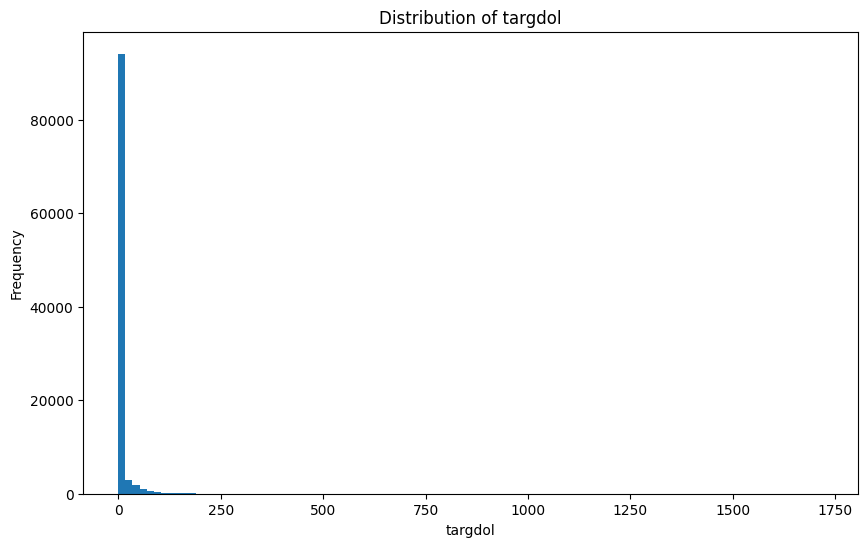

count    101532.000000
mean          4.496579
std          21.446982
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        1720.000000
Name: targdol, dtype: float64

In [12]:
# Descriptive statistics for 'targdol'
targdol_descriptive_stats = data_cleaned['targdol'].describe()

# Distribution plot for 'targdol'
plt.figure(figsize=(10, 6))
data_cleaned['targdol'].hist(bins=100)
plt.title('Distribution of targdol')
plt.xlabel('targdol')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

targdol_descriptive_stats


In [13]:
# Calculate the 95th percentile for 'targdol'
targdol_95th_percentile = data_cleaned['targdol'].quantile(0.95)

# Create a binary outcome variable based on the 95th percentile
# Those above the 95th percentile are considered as 1, and the rest as 0
data_cleaned['high_value'] = (data_cleaned['targdol'] > targdol_95th_percentile).astype(int)

# Updated descriptive statistics for the new binary target
high_value_counts = data_cleaned['high_value'].value_counts(normalize=True)

targdol_95th_percentile, high_value_counts


(29.8999939,
 high_value
 0    0.950666
 1    0.049334
 Name: proportion, dtype: float64)

In [15]:
from sklearn.impute import SimpleImputer

# Imputer for handling any NaN values in the predictors
# We use median imputation here as it is robust to outliers
imputer = SimpleImputer(strategy='median')

# Fit the imputer and transform the training data, then transform the test data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train the logistic regression model again with the imputed data
logreg.fit(X_train_imputed, y_train)

# Predict on the imputed test set
y_pred_imputed = logreg.predict(X_test_imputed)

# Evaluate the model with the imputed data
classification_report_results_imputed = classification_report(y_test, y_pred_imputed)
confusion_matrix_results_imputed = confusion_matrix(y_test, y_pred_imputed)

classification_report_results_imputed, confusion_matrix_results_imputed


('              precision    recall  f1-score   support\n\n           0       0.96      1.00      0.98     28987\n           1       0.79      0.08      0.15      1473\n\n    accuracy                           0.95     30460\n   macro avg       0.87      0.54      0.56     30460\nweighted avg       0.95      0.95      0.94     30460\n',
 array([[28954,    33],
        [ 1350,   123]]))

In [16]:
from sklearn.linear_model import LinearRegression

# Filter out the test set to include only instances predicted as high value (class 1) by the logistic regression model
X_test_high_value = X_test[y_pred_imputed == 1]
y_test_high_value = y_test[y_pred_imputed == 1]

# We need the actual continuous target values for these instances, not the binary outcome
# So we'll get the 'targdol' values from the original dataset based on the index of the filtered test set
y_test_high_value_continuous = data_cleaned.loc[X_test_high_value.index, 'targdol']

# Split this high value data into a new training and test set for multiple regression
X_train_high_value, X_test_high_value, y_train_high_value, y_test_high_value = train_test_split(
    X_test_high_value, y_test_high_value_continuous, test_size=0.3, random_state=42)

# Since we're working with a smaller dataset now, let's impute the training and test set once more
X_train_high_value_imputed = imputer.transform(X_train_high_value)
X_test_high_value_imputed = imputer.transform(X_test_high_value)

# Initialize the Linear Regression model
linreg = LinearRegression()

# Fit the model on the high value training data
linreg.fit(X_train_high_value_imputed, y_train_high_value)

# Predict on the high value test set
y_pred_high_value_continuous = linreg.predict(X_test_high_value_imputed)

# We will not evaluate the model formally here since we need regression metrics
# Let's return the first few predictions
y_pred_high_value_continuous[:5]


array([ 71.37763788, 178.46189102,  58.57398843, 102.77489896,
        76.56349941])

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute regression evaluation metrics
r2 = r2_score(y_test_high_value, y_pred_high_value_continuous)
mse = mean_squared_error(y_test_high_value, y_pred_high_value_continuous)
mae = mean_absolute_error(y_test_high_value, y_pred_high_value_continuous)

r2, mse, mae


(0.021233064719786587, 8576.233879919302, 58.62402972551853)

In [18]:
from sklearn.model_selection import cross_val_score

# For the logistic regression model: perform cross-validation for accuracy
logreg_cv_scores = cross_val_score(logreg, X_train_imputed, y_train, cv=5, scoring='accuracy')

# For the linear regression model: perform cross-validation for R-squared
linreg_cv_scores = cross_val_score(linreg, X_train_high_value_imputed, y_train_high_value, cv=5, scoring='r2')

logreg_cv_scores.mean(), linreg_cv_scores.mean()


(0.95306233281223, -21.657545405254762)

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create a polynomial regression model by creating a pipeline
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Fit the polynomial regression model on the high-value training data
poly_model.fit(X_train_high_value_imputed, y_train_high_value)

# Predict on the high-value test set
y_pred_poly = poly_model.predict(X_test_high_value_imputed)

# Compute regression evaluation metrics for polynomial regression
poly_r2 = r2_score(y_test_high_value, y_pred_poly)
poly_mse = mean_squared_error(y_test_high_value, y_pred_poly)
poly_mae = mean_absolute_error(y_test_high_value, y_pred_poly)

poly_r2, poly_mse, poly_mae


(-89.53903419467453, 793328.7328440846, 482.6301729406439)

In [20]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)

# Fit the model on the high value training data
tree_model.fit(X_train_high_value_imputed, y_train_high_value)

# Predict on the high value test set
y_pred_tree = tree_model.predict(X_test_high_value_imputed)

# Compute regression evaluation metrics for decision tree regression
tree_r2 = r2_score(y_test_high_value, y_pred_tree)
tree_mse = mean_squared_error(y_test_high_value, y_pred_tree)
tree_mae = mean_absolute_error(y_test_high_value, y_pred_tree)

tree_r2, tree_mse, tree_mae


(0.009740490809444391, 8676.935076684942, 59.018491708936175)

In [21]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the high-value training data
forest_model.fit(X_train_high_value_imputed, y_train_high_value)

# Predict on the high-value test set
y_pred_forest = forest_model.predict(X_test_high_value_imputed)

# Compute regression evaluation metrics for random forest regression
forest_r2 = r2_score(y_test_high_value, y_pred_forest)
forest_mse = mean_squared_error(y_test_high_value, y_pred_forest)
forest_mae = mean_absolute_error(y_test_high_value, y_pred_forest)

forest_r2, forest_mse, forest_mae


(0.16974844468414052, 7274.899938785779, 56.76668979959576)

In [22]:
# Extracting TP, FP, FN, TN from the confusion matrix of the logistic regression model
tn, fp, fn, tp = confusion_matrix_results_imputed.ravel()

# Financial values
benefit_per_tp = 100  # Benefit from correctly predicting a high-value sale
cost_per_fp = 50     # Cost from incorrectly predicting a high-value sale
cost_per_fn = 100    # Cost from missing a high-value sale

# Calculate total financial impacts
total_benefit = tp * benefit_per_tp
total_cost = (fp * cost_per_fp) + (fn * cost_per_fn)
net_benefit = total_benefit - total_cost

total_benefit, total_cost, net_benefit


(12300, 136650, -124350)

In [23]:
# Define ranges for sensitivity analysis
benefit_per_tp_range = range(80, 121, 10)  # From $80 to $120 in steps of $10
cost_per_fp_range = range(40, 61, 10)      # From $40 to $60 in steps of $10

# Create a dictionary to store results for easy plotting
sensitivity_results = {}

# Loop through each combination of benefit and cost parameters
for benefit in benefit_per_tp_range:
    for cost in cost_per_fp_range:
        total_benefit = tp * benefit
        total_cost = fp * cost + fn * cost_per_fn  # Including FN cost in case we want to change it later
        net_benefit = total_benefit - total_cost
        sensitivity_results[(benefit, cost)] = net_benefit

sensitivity_results


{(80, 40): -126480,
 (80, 50): -126810,
 (80, 60): -127140,
 (90, 40): -125250,
 (90, 50): -125580,
 (90, 60): -125910,
 (100, 40): -124020,
 (100, 50): -124350,
 (100, 60): -124680,
 (110, 40): -122790,
 (110, 50): -123120,
 (110, 60): -123450,
 (120, 40): -121560,
 (120, 50): -121890,
 (120, 60): -122220}